- [✔️] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [✔️] Считать данные и вывести их основные характеристики, описание признаков.
- [✔️] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [✔️] * (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [✔️] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [✔️] * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [✔️] * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

Данные взяты из тренировочного контеста "Spaceship Titanic" с kaggle
https://www.kaggle.com/competitions/spaceship-titanic/overview

### Описание датасета:

- PassengerId — уникальный id пассажира
- HomePlanet — планета, на которой пассажир взошёл на корабль
- CryoSleep — перемещался ли пассажир в состоянии криосна
- Cabin — номер каюты, вида: палуба/номер/сторона, сторона может быть P - левой, S - правой
- Destination — адрес назначения
- Age         — возраст
- VIP         — оплатил ли пассажир vip сервис
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck — сколько денег пассажир потратил на разные услуги
- Name       — имя и фамилия
- Transported — (целевой признак) — был ли пассажир перенесён аномалией в другое пространство

Эти данные представляют информацию о пассажирах космического корабля "Титаник", который столкнулся с аномалией. 
Необходимо предсказывать, был ли пассажир унесён аномалией или нет (признак "Transported")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


df = pd.read_csv("train.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [2]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Довольно много пропущенных значений.

In [3]:
df['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

Лишь немного больше половины пассажиров было унесено аномалией .

In [4]:
df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


***
### Попытаемся найти какие-нибудь закономерности в данных

Рассмотрим признак CryoSleep

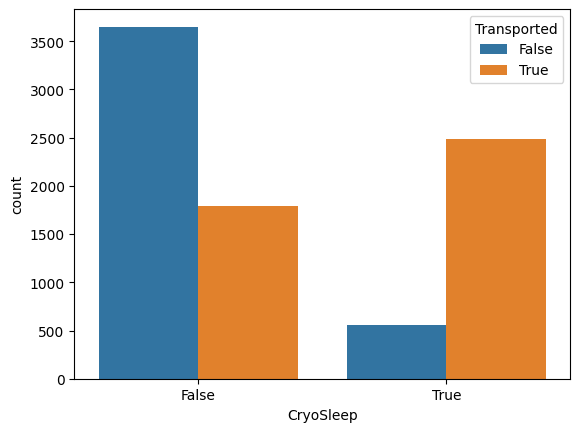

In [5]:
sns.countplot(x="CryoSleep", hue="Transported", data=df);

Можно заметить, что большая часть тех, кто был в криосне, пропали в аномалии и они же составляют большую часть пропавших. Можно предположить, что капсулы для сна были неудачно расположены ближе к зоне поражения или что спящие не смогли убежать в более безопасное место.

Рассмотрим признак Age

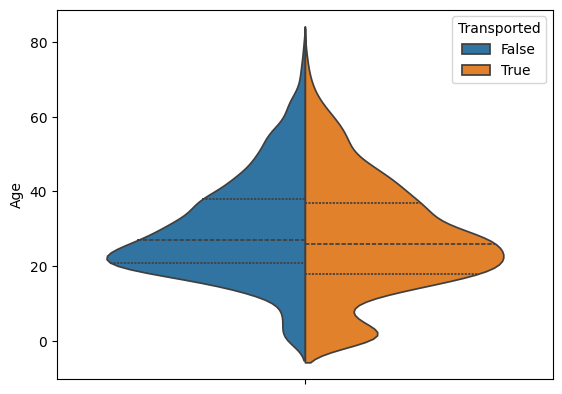

In [6]:
sns.violinplot(data=df, y="Age", hue="Transported", split=True,  inner="quart");

In [7]:
freq_by_age = df.groupby(["Age"]).Transported.agg(func="mean")
freq_by_age = pd.DataFrame(freq_by_age.reset_index())
freq_by_age[freq_by_age["Age"] < 10]

,Age,Transported
0,0.0,0.808989
1,1.0,0.731343
2,2.0,0.706667
3,3.0,0.786667
4,4.0,0.746479
5,5.0,0.606061
6,6.0,0.575000
7,7.0,0.615385
8,8.0,0.565217
9,9.0,0.571429


Особенно много было унесено младенцев

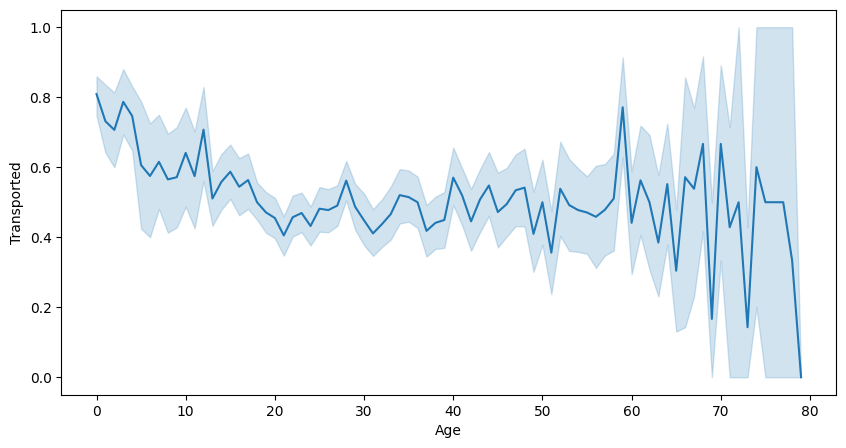

In [8]:
_, ax = plt.subplots(1, 1, figsize=(10,5))
sns.lineplot(df, x='Age', y='Transported', ax=ax);

Можно заметить, что достаточно часто дети пропадали в аномалии.

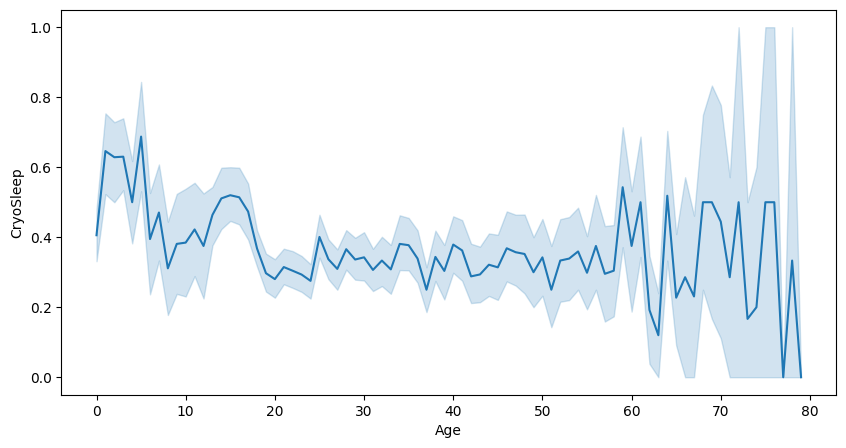

In [9]:
_, ax = plt.subplots(1, 1, figsize=(10,5))
sns.lineplot(df, x='Age', y='CryoSleep', ax=ax);

Также можно заметить, что дети чаще (особенно совсем маленькие) летели в состоянии криосна

Рассмотрим признак HomePlanet

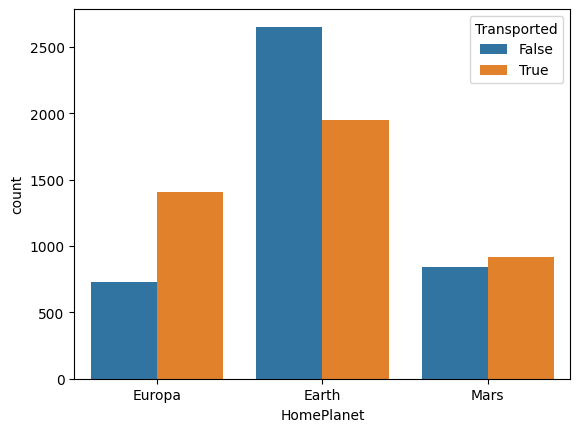

In [10]:
sns.countplot(data=df, hue="Transported", x="HomePlanet");

Здесь сложно сделать какое-то осмысленное предположение, которое могло бы объяснить, почему вероятность быть похищенным аномалией выше для пассажиров с Европы. Вероятно, есть какая-то дополнительная зависимость между местом посадки и например палубой/каютой.

Рассмотрим признак Destination

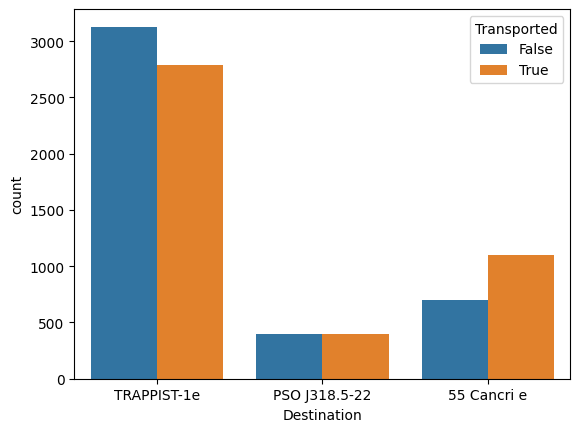

In [11]:
sns.countplot(data=df, hue="Transported", x="Destination");

Кажется, что этот признак не является особо содержательным, что в целом ожидаемо в ситуации столкновения корабля с аномалией.

### Преобразуем некоторые признаки, заполним пропущенные значения
***

Поскольку номер каюты имеет сложный вид: палуба/номер/сторона, необходимо преобразовать его для удобства работы с ним. После преобразования выкинем исходный признак.

In [12]:
df[["deck", "num", "side"]] = df["Cabin"].str.split("/", expand=True) 
df.drop(["Cabin"], axis=1, inplace=True)
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


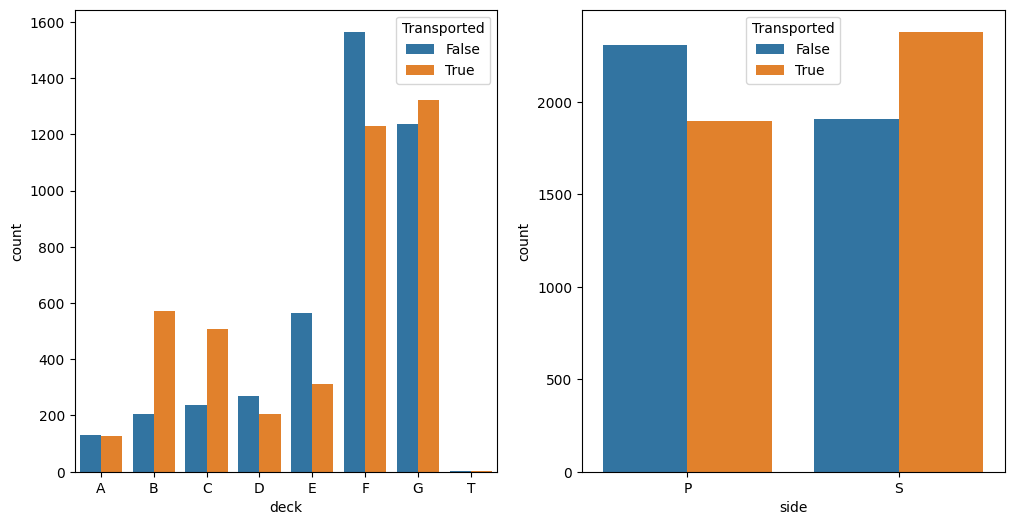

In [13]:
_, ax = plt.subplots(1, 2, figsize=(12,6))
sns.countplot(data=df, hue="Transported", x="deck", order="ABCDEFGT", ax=ax[0]);
sns.countplot(data=df, hue="Transported", x="side",  ax=ax[1]);

Аномалия уносила людей чаще с палуб B и C и с правого борта (S)

PassengerId имеет формат gggg_pp, где gggg - номер группы, а pp - номер пассажира внутри группы. Часто члены группы являются родственниками, но не всегда. Преобразуем данные для удобства

In [14]:
df[["group_id", "num_in_group"]] = df["PassengerId"].str.split("_", expand=True) 
df.drop(["PassengerId"], axis=1, inplace=True)

Создадим новый признак group_size, обозначающий размер группы, в которой находится человек.

In [15]:
df["group_size"] = df.groupby(["group_id"])["group_id"].transform(len)

Создадим новый признак MoneySpent, обозначающий траты человека на борту

In [16]:
df["MoneySpent"] = sum([df["Spa"], df["VRDeck"], df["FoodCourt"], df["RoomService"], df["ShoppingMall"]])

Предположим, что людям в криосне не нужны дополнительные услуги

In [17]:
df[df["CryoSleep"] == True][["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum()

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

Предположение оказалось верным, заполним пропущенные значения для тех, кто спит нулями

In [18]:
for category in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
    df.loc[df["CryoSleep"] == True, category] = df.loc[df["CryoSleep"] == True, category].fillna(0)

In [19]:
df[df["CryoSleep"] == True][["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].isnull().sum()

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

Заполним признак VIP

In [20]:
print(df[df["CryoSleep"] == True]["VIP"].sum())
print(len(df[df["CryoSleep"] == True]))
print(df[df["CryoSleep"] == True]["VIP"].isnull().sum())

21
3037
75


У большинства людей в криосне нет vip статуса, поскольку, вероятно, он им не нужен. Можем заполнить пропущенные значения vip для спящих

In [21]:
df.loc[df["CryoSleep"] == True,"VIP"] = df.loc[df["CryoSleep"] == True,"VIP"].fillna(False)
df[df["CryoSleep"] == True]["VIP"].isnull().sum()

0

Также, для тех, кто тратил деньги, заполним CryoSleep False'ами (Поскольку они тратили деньги на услуги, они не могли спать)

In [22]:
df.loc[df["MoneySpent"] > 0, "CryoSleep"] = df.loc[df["MoneySpent"] > 0, "CryoSleep"].fillna(False)

Заменим значения бортов с S на 1 и P на 0, а также поменяем буквы в палубах на номера соответствующие глубине

In [23]:
df.replace({"side": {"S": 1, "P": 0}, "deck": {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}}, inplace=True)

***

Выбросим признаки со строками (из них не выйдет извлечь ценную информацию) и построим матрицу корреляции

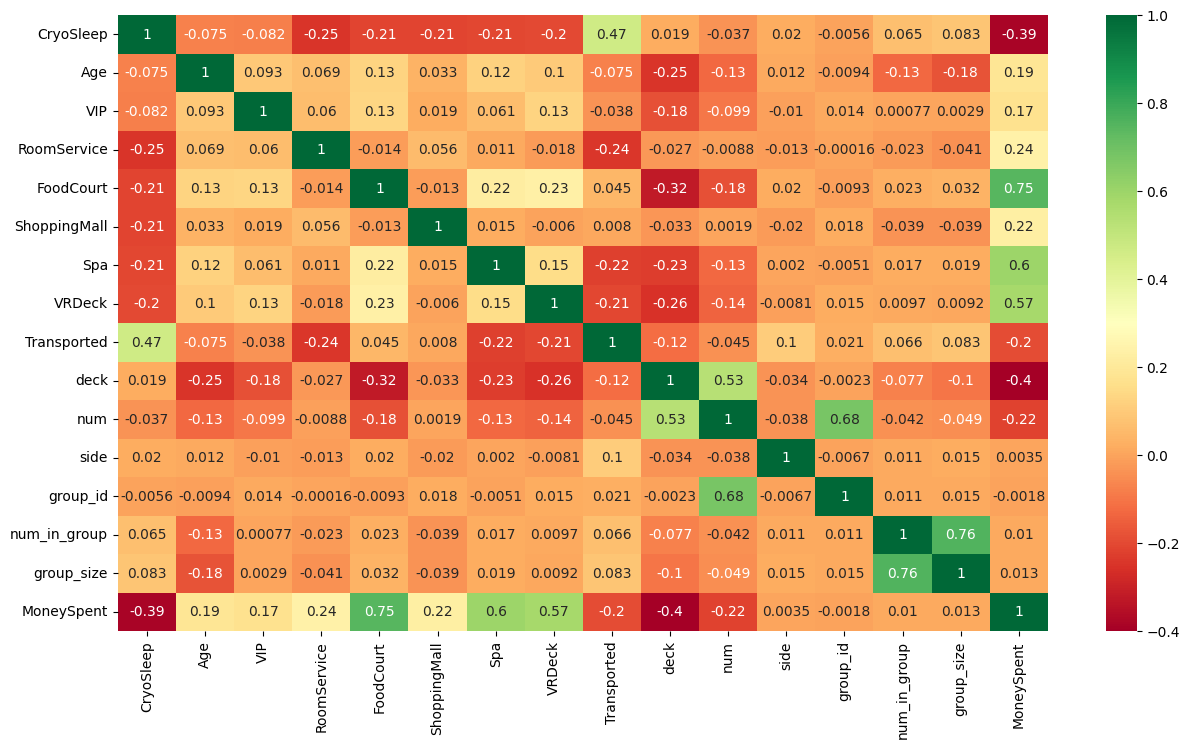

In [24]:
df.drop(["HomePlanet", "Destination", "Name"], axis=1, inplace=True)
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

Видно, что целевой признак Transported сильно зависит от CryoSleep. Определенно есть зависимость между палубой и стороной. Что было достаточно неожиданным, на то, унесло человека или нет влияет сумма денег, которую он потратил на услуги. 

В целом, первую модель можно попробовать обучить со следующим набором признаков: "Transported", "CryoSleep", "deck", "MoneySpent", "side", поскольку они являются самыми важными